In [20]:
## Uploading the dataset
from google.colab import files
file_path = files.upload()

Saving filtered_4x4_labels_0_and_1.csv to filtered_4x4_labels_0_and_1 (1).csv


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1037 - val_loss: 0.0514
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0454 - val_loss: 0.0392
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0369 - val_loss: 0.0359
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0319 - val_loss: 0.0286
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0250 - val_loss: 0.0236
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0216 - val_loss: 0.0220
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0203 - val_loss: 0.0210
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0182 - val_loss: 0.0200
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - val_loss: 0.0199
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0162 - val_loss: 0.0191
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - val_loss: 0.0184
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_l

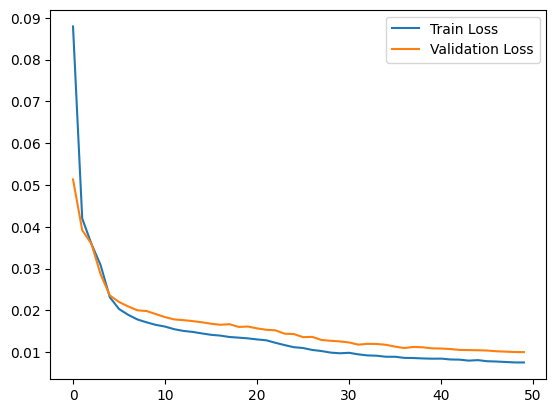

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
data = pd.read_csv('filtered_4x4_labels_0_and_1.csv', header=None)

# The last column appears to be labels, we separate the features (first 16 columns)
X = data.iloc[:, :-1].values

# Normalize the data (0 to 1 range)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape into 4x4 images
X_scaled = X_scaled.reshape(-1, 4, 4, 1)

# Split into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build the autoencoder model
latent_dim = 8  # Maximum of 8 latent variables

# Encoder
input_img = tf.keras.layers.Input(shape=(4, 4, 1))
x = tf.keras.layers.Flatten()(input_img)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
latent = tf.keras.layers.Dense(latent_dim, activation='relu', name='latent')(x)

# Decoder
x = tf.keras.layers.Dense(16, activation='relu')(latent)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='sigmoid')(x)
output_img = tf.keras.layers.Reshape((4, 4, 1))(x)

# Autoencoder Model
autoencoder = tf.keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')

# Setup TensorBoard
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1, embeddings_freq=1)

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test), callbacks=[tensorboard_callback])

# Visualize Latent Variables using TensorBoard
latent_model = tf.keras.Model(input_img, latent)
latent_representations = latent_model.predict(X_test)

# Logging the latent variables for TensorBoard
log_dir = 'logs/latent_vars'
latent_variable_callback = TensorBoard(log_dir=log_dir)
latent_variable_callback.set_model(latent_model)

# Plot the performance
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Save the autoencoder model
autoencoder.save('autoencoder_model.h5')

In [22]:
tensorboard --logdir logs

<IPython.core.display.Javascript object>